# K-Nearest Neighbors Regression Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Merged_data = pd.read_excel('Merged_data.xlsx')

In [3]:
Merged_data.columns

Index(['Date', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'precipitation (mm)', 'et0_fao_evapotranspiration (mm)',
       'wind_speed_10m (km/h)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'direct_radiation (W/m²)', 'Turbidity'],
      dtype='object')

In [4]:
Merged_data.dtypes

Date                               datetime64[ns]
temperature_2m (°C)                       float64
relative_humidity_2m (%)                    int64
precipitation (mm)                        float64
et0_fao_evapotranspiration (mm)           float64
wind_speed_10m (km/h)                     float64
wind_gusts_10m (km/h)                     float64
soil_temperature_0_to_7cm (°C)            float64
soil_moisture_0_to_7cm (m³/m³)            float64
direct_radiation (W/m²)                     int64
Turbidity                                 float64
dtype: object

In [5]:
Merged_data.set_index('Date', inplace=True)

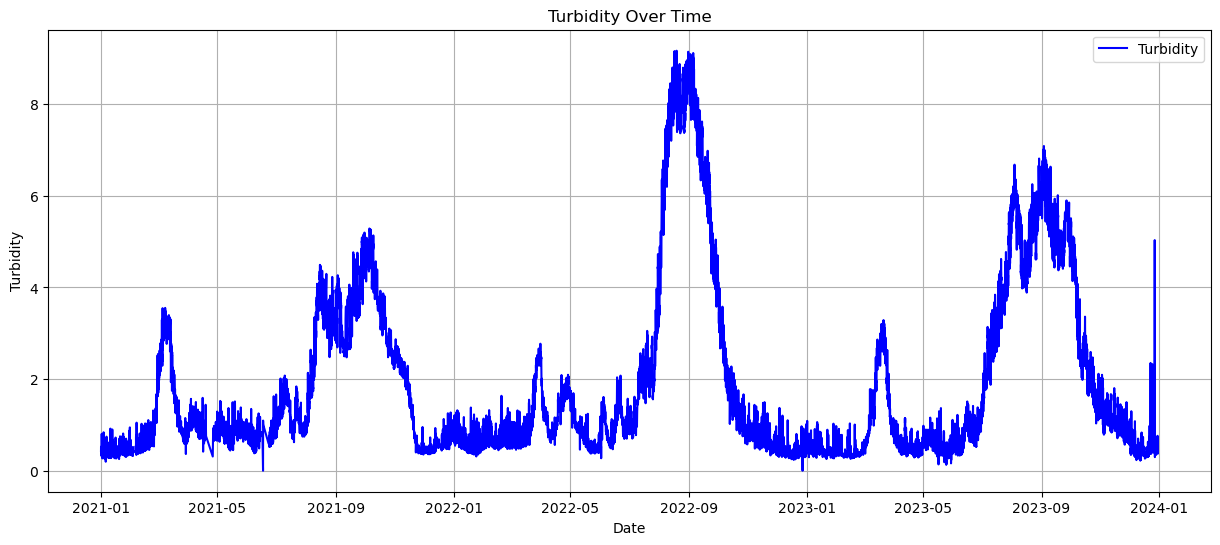

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(Merged_data.index, Merged_data['Turbidity'], label='Turbidity', color='blue')
plt.title('Turbidity Over Time')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.legend()
plt.grid()
plt.show()


In [7]:
Merged_data.shape

(26251, 10)

In [8]:
Merged_data.isnull().sum()

temperature_2m (°C)                0
relative_humidity_2m (%)           0
precipitation (mm)                 0
et0_fao_evapotranspiration (mm)    0
wind_speed_10m (km/h)              0
wind_gusts_10m (km/h)              0
soil_temperature_0_to_7cm (°C)     0
soil_moisture_0_to_7cm (m³/m³)     0
direct_radiation (W/m²)            0
Turbidity                          0
dtype: int64

In [9]:
X = Merged_data.drop(columns=['Turbidity'])
y = Merged_data['Turbidity']

In [ ]:
# 2. Create sliding window dataset
# def create_sliding_window(data, window_size):
    # X, y = [], []
    # for i in range(len(data) - window_size):
        # X.append(data[i:i + window_size])
        # y.append(data[i + window_size])
    # return np.array(X), np.array(y)

# window_size = 24
# X_window, y_window = create_sliding_window(y.values, window_size)

In [12]:
train_size = int(len(Merged_data) * 0.7)
val_size = int(len(Merged_data) * 0.1)
test_size = len(Merged_data) - train_size - val_size
train_data = Merged_data[:train_size]
val_data = Merged_data[train_size:train_size + val_size]
test_data = Merged_data[train_size + val_size:]


In [13]:
X_train = train_data.drop(columns=['Turbidity'])
y_train = train_data['Turbidity']
X_val = val_data.drop(columns=['Turbidity'])
y_val = val_data['Turbidity']
X_test = test_data.drop(columns=['Turbidity'])
y_test = test_data['Turbidity']

In [17]:
# how to use KNN for regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_val = knn.predict(X_val)
y_pred_test = knn.predict(X_test)




In [18]:
# 3. Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)
mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Train MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R2: {r2_train}, MAPE: {mape_train}")
print(f"Validation MAE: {mae_val}, MSE: {mse_val}, RMSE: {rmse_val}, R2: {r2_val}, MAPE: {mape_val}")
print(f"Test MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R2: {r2_test}, MAPE: {mape_test}")


Train MAE: 0.8657144860811021, MSE: 1.8165329999295163, RMSE: 1.3477881880805738, R2: 0.4964570851720681, MAPE: 960121685196.101
Validation MAE: 0.9098133973732198, MSE: 1.4265165272619995, RMSE: 1.1943686730913532, R2: -1.8615766085930772, MAPE: 1.5796583932280825
Test MAE: 1.5831122857062034, MSE: 4.390178332482638, RMSE: 2.0952752402685997, R2: -0.060503561000684325, MAPE: 0.994469033854191


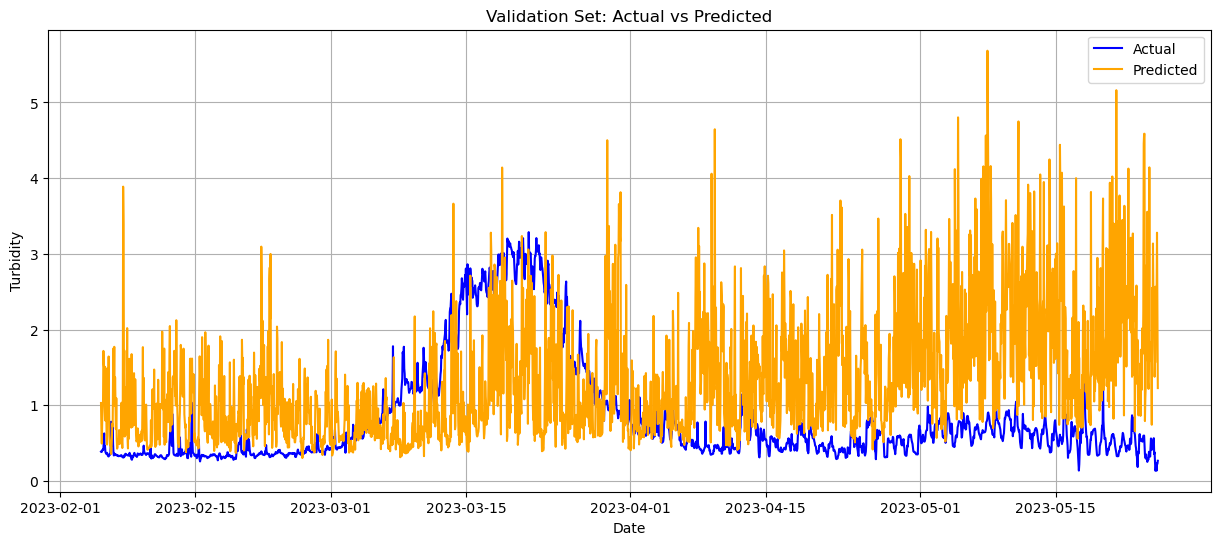

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(y_val.index, y_val, label='Actual', color='blue')
plt.plot(y_val.index, y_pred_val, label='Predicted', color='orange')
plt.title('Validation Set: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.legend()
plt.grid()
plt.show()

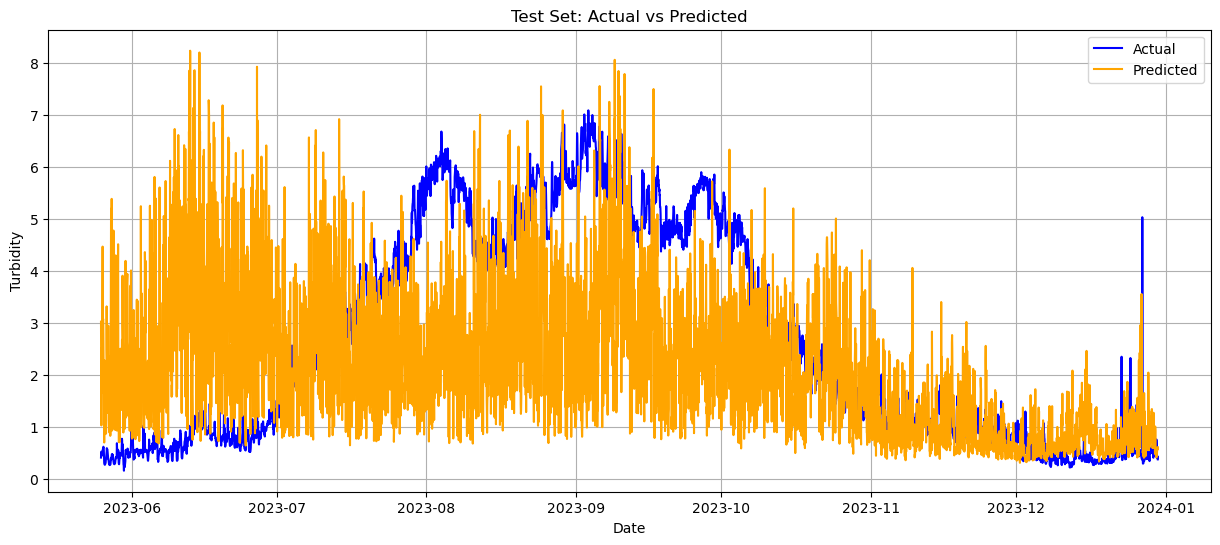

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_test, label='Predicted', color='orange')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.legend()
plt.grid()
plt.show()

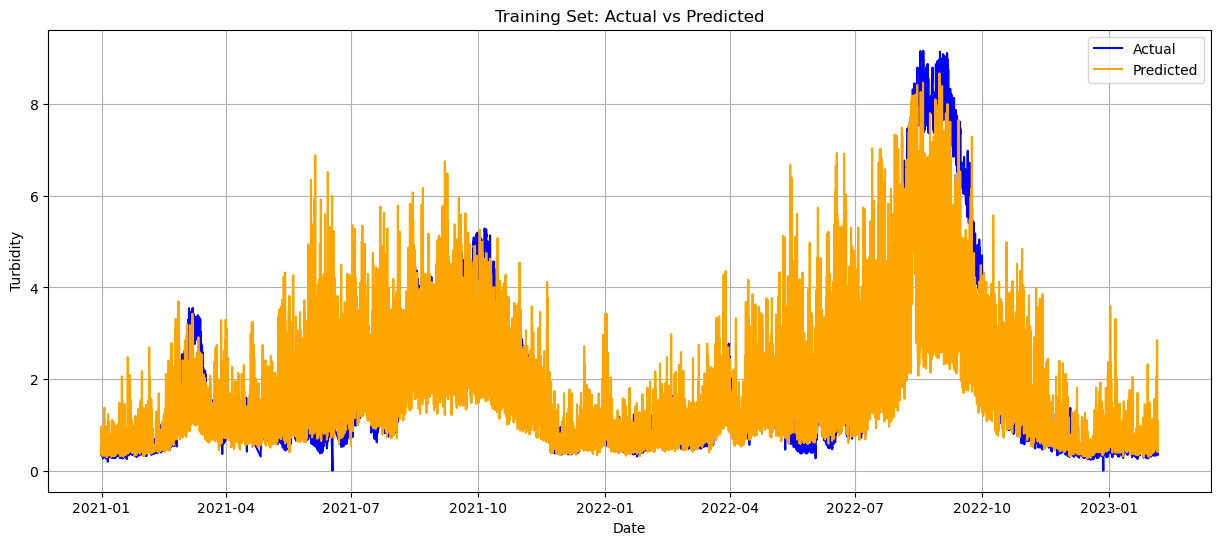

In [21]:
# Plotting the training set predictions
plt.figure(figsize=(15, 6))
plt.plot(y_train.index, y_train, label='Actual', color='blue')
plt.plot(y_train.index, y_pred_train, label='Predicted', color='orange')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.legend()
plt.grid()
plt.show()

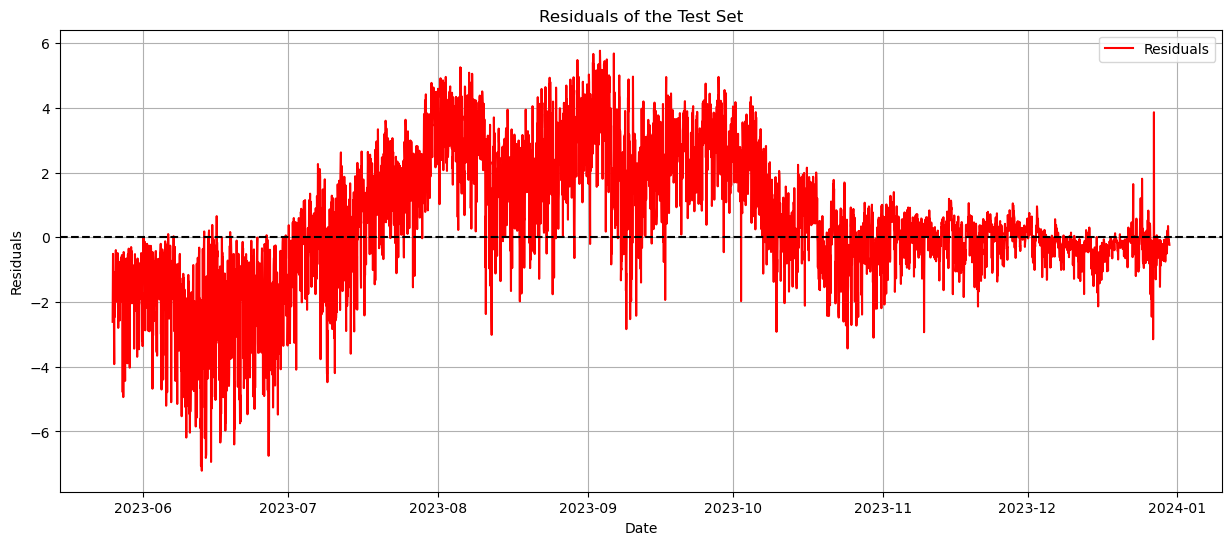

In [23]:
# Plotting the residuals
residuals = y_test - y_pred_test
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, residuals, label='Residuals', color='red')
plt.title('Residuals of the Test Set')
plt.xlabel('Date')
plt.ylabel('Residuals') 
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid()
plt.show()

## Add feature engineering


Validation R2: 0.98
Validation MAE: 0.06
Validation MSE: 0.01
Validation RMSE: 0.10
Validation MAPE: 0.10
Test R2: 0.99
Test MAPE: 0.09
Test MAE: 0.14
Test MSE: 0.05
Test RMSE: 0.21


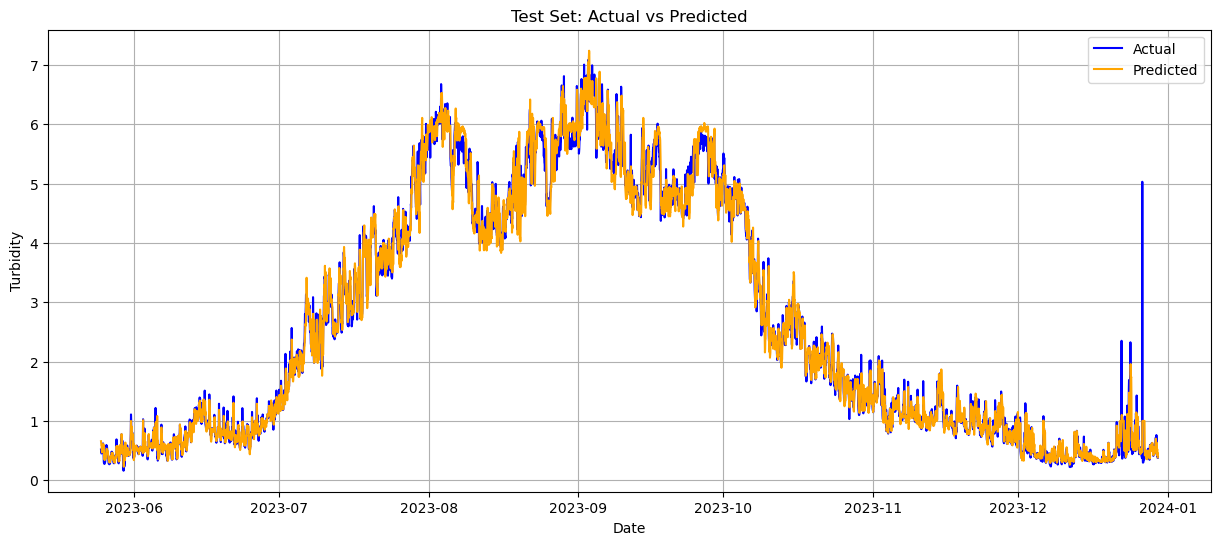

In [26]:
# create feature engineering functions
def create_features(data, window_size):
    features = pd.DataFrame()
    for i in range(1, window_size + 1):
        features[f'lag_{i}'] = data.shift(i)
    features['rolling_mean'] = data.rolling(window=window_size).mean()
    features['rolling_std'] = data.rolling(window=window_size).std()
    return features

def create_target(data, window_size):
    target = data.shift(-window_size)
    return target


# create features and target
features = create_features(Merged_data['Turbidity'], 12)
target = create_target(Merged_data['Turbidity'], 12)


# drop NaN values
features.dropna(inplace=True)
target.dropna(inplace=True)


# split the data into train, validation, and test sets
train_size = int(len(features) * 0.7)
val_size = int(len(features) * 0.1)
test_size = len(features) - train_size - val_size
train_features = features[:train_size]
train_target = target[:train_size]
val_features = features[train_size:train_size + val_size]
val_target = target[train_size:train_size + val_size]
test_features = features[train_size + val_size:]
test_target = target[train_size + val_size:]


# scale the features
scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(train_features)
val_features_scaled = scaler.transform(val_features)
test_features_scaled = scaler.transform(test_features)


# create and fit the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_features_scaled, train_target)
# make predictions on the validation set
val_predictions = knn.predict(val_features_scaled)


# evaluate the model on the validation set
mae_val = mean_absolute_error(val_target, val_predictions)
mse_val = mean_squared_error(val_target, val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(val_target, val_predictions)
mape_val = mean_absolute_percentage_error(val_target, val_predictions)
print(f"Validation R2: {r2_val:.2f}")
print(f"Validation MAE: {mae_val:.2f}")
print(f"Validation MSE: {mse_val:.2f}")
print(f"Validation RMSE: {rmse_val:.2f}")
print(f"Validation MAPE: {mape_val:.2f}")


# make predictions on the test set
test_predictions = knn.predict(test_features_scaled)


# evaluate the model on the test set
mae_test = mean_absolute_error(test_target, test_predictions)
mse_test = mean_squared_error(test_target, test_predictions)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(test_target, test_predictions)
r2_score_test = r2_score(test_target, test_predictions)
print(f"Test R2: {r2_score_test:.2f}")
print(f"Test MAPE: {mape_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


# Plotting the test set predictions
plt.figure(figsize=(15, 6))
plt.plot(test_target.index, test_target, label='Actual', color='blue')
plt.plot(test_target.index, test_predictions, label='Predicted', color='orange')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.legend()
plt.grid()
plt.show()